In [25]:
%%capture
import sys
#!{sys.executable} -m pip install swifr
!{sys.executable} -m pip install --upgrade swifr
!python -m pip show swifr


In [26]:
%%capture
!swifr_train --path /Applications/anaconda3/lib/python3.6/site-packages/swifr_pkg/test_data/SWIFr_train_seeds_rm_w1

In [27]:
!swifr_test --path2trained /Applications/anaconda3/lib/python3.6/site-packages/swifr_pkg/test_data/SWIFr_train_seeds_rm_w1 --file /Applications/anaconda3/lib/python3.6/site-packages/swifr_pkg/test_data/SWIFr_train_seeds_rm_w1/classified/test_set.txt --pi 0.5 0.5

classes:
['wheat_2', 'wheat_3']
Using priors:
p(wheat_2) = 0.5
p(wheat_3) = 0.5


In [28]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

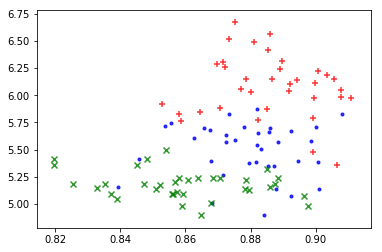

In [29]:
df = np.loadtxt('/Applications/anaconda3/lib/python3.6/site-packages/swifr_pkg/test_data/SWIFr_train_seeds_rm_w1/classified/test_set_classified', skiprows=1, usecols=[3,4,8,9,10,11,12,13])
#0-1: C, l_kernel, 2:class,3-4:pi,5-6:swifr_prob,7-8:reliability
colors = ['blue','red','green']
colors = ['blue','red','green']
markers = ['.','+','x']
ax = plt.gca()
for i in range(3):
    mask = (df[:,2] == i+1)
    ax.scatter(df[mask, 0], df[mask, 1], alpha=0.8, c=colors[i], marker=markers[i])

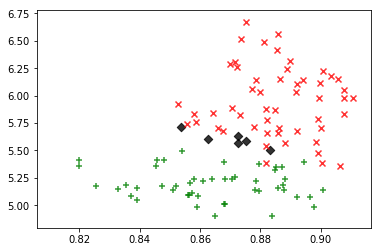

In [30]:
col = df[:,6]
conditions = [col >= 0.9, (col < 0.9) & (col > 0.1), col <= 0.1]
choices = ["1", '2', '3']
new = np.select(conditions, choices, default = np.nan)
df2 = np.insert(df,8, new,axis=1)
colors = ['green','black','red']
markers = ['+','D','x']
ax = plt.gca()
for i in range(3):
    mask = (df2[:,8] == i+1)
    ax.scatter(df2[mask, 0], df2[mask, 1], alpha=0.8, c=colors[i], marker=markers[i])

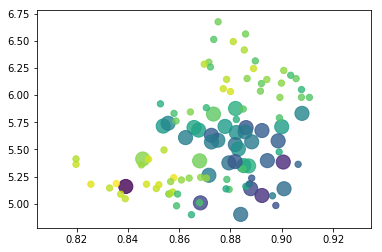

In [31]:
col = df[:,2]
conditions = [col == 1, col == 2, col == 3]
choices = ["200", '40', '40']
new2 = np.select(conditions, choices, default = np.nan)
df2 = np.insert(df,8, new2,axis=1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df2[:,0],df2[:,1],c=df2[:,7], s=df2[:,8],alpha=0.8)